In [1]:
%pip install numpy tqdm opt_einsum pandas seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
example_clusterfile = "../output/lib-dinuc-AA-1.0.clust"
if not os.path.exists(example_clusterfile):
    os.system("../download-library.sh")

In [3]:
# library: dinuc or trinuc
lib = "dinuc"

In [4]:
from closest_fit import ClosestFit
obj = ClosestFit(lib)

In [5]:
database = "pfam"
fam_id = "PF00313"
sample = 0  # set sample=0 to consider all
seed = 0

In [6]:
completeness = obj.get_completeness(database, fam_id)

In [7]:
print("Completeness from direct cluster analysis")
print()
for precision in (0.5, 1.0, 2.0):
    nfrag = 0
    n_complete = 0
    n_certain = 0
    for k, v in completeness.items():
        if k[1] != precision:
            continue
        v_complete, v_certain = v
        assert len(v_complete) == len(v_certain)
        nfrag += len(v_complete)
        n_complete += v_complete.sum()
        n_certain += v_certain.sum()
    print(f"Completeness at {precision} A: {n_complete/nfrag*100:.2f} %, uncertainty {100 - n_certain/nfrag*100:.2f} %")

Completeness from direct cluster analysis

Completeness at 0.5 A: 70.55 %, uncertainty 7.64 %
Completeness at 1.0 A: 97.09 %, uncertainty 2.55 %
Completeness at 2.0 A: 100.00 %, uncertainty 0.00 %


In [8]:
closest_fit = obj.get_closest_fit(database, fam_id, max_sample=sample)

Iterate over sequence motifs...:   0%|          | 0/4 [00:00<?, ?it/s]

Find 1.0A bullseye clusters...:   0%|          | 0/13 [00:00<?, ?it/s]

Find 2.0A bullseye clusters...:   0%|          | 0/10 [00:00<?, ?it/s]

Search remaining:   0%|          | 0/10 [00:00<?, ?it/s]

Find 1.0A bullseye clusters...:   0%|          | 0/11 [00:00<?, ?it/s]

Find 2.0A bullseye clusters...:   0%|          | 0/9 [00:00<?, ?it/s]

Search remaining:   0%|          | 0/2 [00:00<?, ?it/s]

Find 1.0A bullseye clusters...:   0%|          | 0/16 [00:00<?, ?it/s]

Find 2.0A bullseye clusters...:   0%|          | 0/15 [00:00<?, ?it/s]

Search remaining:   0%|          | 0/7 [00:00<?, ?it/s]

Find 1.0A bullseye clusters...:   0%|          | 0/13 [00:00<?, ?it/s]

Find 2.0A bullseye clusters...:   0%|          | 0/10 [00:00<?, ?it/s]

Search remaining:   0%|          | 0/9 [00:00<?, ?it/s]

In [9]:
closest_fit_baseline = obj.get_closest_fit_baseline(database, fam_id)

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

data = pd.DataFrame()
bins = [0] + np.arange(0.2, 3.1, 0.05).tolist()
data.index = bins

def to_bins(d):
    result = []
    for bin in bins:
        fail = (d >= bin).sum() / len(d)
        result.append(fail)
    return result

baseline = np.concatenate(list(closest_fit_baseline.values()))
data["baseline"] = to_bins(baseline)

from_non_family = np.concatenate(list(closest_fit.values()))
data["from non-family"] = to_bins(from_non_family)


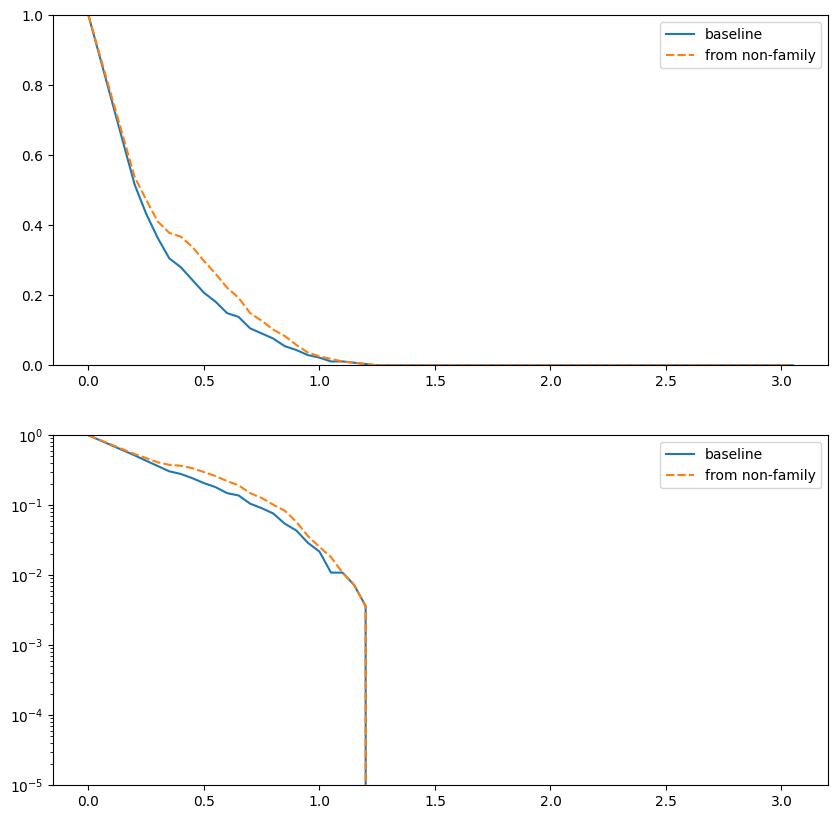

In [11]:
fig, axes = plt.subplots(2,1, figsize=(10, 10))
sns.lineplot(data, ax=axes[0])
sns.lineplot(data, ax=axes[1])

axes[0].set_ybound(0, 1)

axes[1].set_yscale("log")
axes[1].set_ybound(0.00001, 1)


In [13]:
print("Completeless from multi-resolution closest fit")
print()
for precision in (0.5, 1.0, 2.0):
    nfrag = 0
    n_complete = 0
    for k, v in closest_fit.items():
        nfrag += len(v)
        n_complete += (v < precision).sum()
    print(f"Completeness at {precision} A: {n_complete/nfrag*100:.2f} %")

Completeless from multi-resolution closest fit

Completeness at 0.5 A: 70.18 %
Completeness at 1.0 A: 97.45 %
Completeness at 2.0 A: 100.00 %
